In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [55]:
df = pd.read_csv("C:/Users/gram/Downloads/umafall.csv")

df

,MPU_x,MPU_y,MPU_z,subject,type,activity,trial
0,0.871582,-0.092041,0.540771,1,ADL,Aplausing,1
1,0.861572,-0.032959,0.534668,1,ADL,Aplausing,1
2,0.873291,-0.091064,0.583740,1,ADL,Aplausing,1
3,0.939209,-0.093018,0.580322,1,ADL,Aplausing,1
4,0.871094,-0.090820,0.586914,1,ADL,Aplausing,1
...,...,...,...,...,...,...,...
123395,0.047119,1.010254,0.095459,18,Fall,lateralFall,9
123396,0.051025,1.004150,0.097168,18,Fall,lateralFall,9
123397,0.052979,1.007568,0.099854,18,Fall,lateralFall,9
123398,0.053223,1.009521,0.153564,18,Fall,lateralFall,9


In [56]:
df.columns

Index(['MPU_x', 'MPU_y', 'MPU_z', 'subject', 'type', 'activity', 'trial'], dtype='object')

In [57]:
df.count()

MPU_x       123400
MPU_y       123400
MPU_z       123400
subject     123400
type        123400
activity    123400
trial       123400
dtype: int64

Text(0.5, 1.0, 'trial')

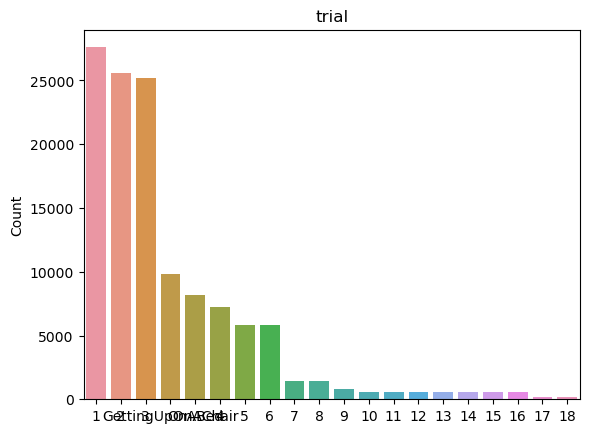

In [58]:
#trial 별 개수
sns.countplot(data = df, x="trial")
plt.xlabel("")
plt.ylabel("Count")
plt.title("trial")

In [59]:
df['trial'].value_counts()

trial
1                    27600
2                    25600
3                    25200
GettingUpOnAChair     9800
OnABed                8200
4                     7200
5                     5800
6                     5800
7                     1400
8                     1400
9                      800
10                     600
11                     600
12                     600
13                     600
14                     600
15                     600
16                     600
17                     200
18                     200
Name: count, dtype: int64

In [60]:
trial_encode = LabelEncoder()
df['type'] = trial_encode.fit_transform(df['type'].values.ravel())
df['activity'] = trial_encode.fit_transform(df['activity'].values.ravel())
df

,MPU_x,MPU_y,MPU_z,subject,type,activity,trial
0,0.871582,-0.092041,0.540771,1,0,0,1
1,0.861572,-0.032959,0.534668,1,0,0,1
2,0.873291,-0.091064,0.583740,1,0,0,1
3,0.939209,-0.093018,0.580322,1,0,0,1
4,0.871094,-0.090820,0.586914,1,0,0,1
...,...,...,...,...,...,...,...
123395,0.047119,1.010254,0.095459,18,1,14,9
123396,0.051025,1.004150,0.097168,18,1,14,9
123397,0.052979,1.007568,0.099854,18,1,14,9
123398,0.053223,1.009521,0.153564,18,1,14,9


In [61]:
X=df.drop('trial',axis=1)
X.head()

,MPU_x,MPU_y,MPU_z,subject,type,activity
0,0.871582,-0.092041,0.540771,1,0,0
1,0.861572,-0.032959,0.534668,1,0,0
2,0.873291,-0.091064,0.583740,1,0,0
3,0.939209,-0.093018,0.580322,1,0,0
4,0.871094,-0.090820,0.586914,1,0,0


In [62]:
y=df['trial']
y.value_counts()

trial
1                    27600
2                    25600
3                    25200
GettingUpOnAChair     9800
OnABed                8200
4                     7200
5                     5800
6                     5800
7                     1400
8                     1400
9                      800
10                     600
11                     600
12                     600
13                     600
14                     600
15                     600
16                     600
17                     200
18                     200
Name: count, dtype: int64

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.1, shuffle = True, random_state = 21)
X_train = X_train.values
X_test = X_test.values
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((111060, 6), (12340, 6), (111060,), (12340,))

In [79]:
y_train_onehot = pd.get_dummies(y_train).values
y_test_onehot = pd.get_dummies(y_test).values

In [80]:
print(X_train.shape)
print(X_test.shape)
print(y_train_onehot.shape)
print(y_test_onehot.shape)

(111060, 6)
(12340, 6)
(111060, 20)
(12340, 20)


In [81]:
#데이터셋을 3차원으로 변환

X_train = X_train.reshape(len(X_train), X_train.shape[1], 1)
X_test = X_test.reshape(len(X_test), X_test.shape[1], 1)
X_train.shape, X_test.shape

((111060, 6, 1), (12340, 6, 1))

In [82]:
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Input
from keras.layers import Dense, Flatten, Dropout

In [84]:
input_layer = Input(shape=(6, 1))

conv1 = Conv1D(filters=64, kernel_size=6, padding = 'same', activation='relu')(input_layer)
flat = Flatten()(conv1)
dens = Dense(64, activation = "relu")(flat)
outputs = Dense(20, activation = "softmax")(dens)

model = keras.Model(input_layer, outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 6, 1)]            0         
                                                                 
 conv1d_7 (Conv1D)           (None, 6, 64)             448       
                                                                 
 flatten_7 (Flatten)         (None, 384)               0         
                                                                 
 dense_14 (Dense)            (None, 64)                24640     
                                                                 
 dense_15 (Dense)            (None, 20)                1300      
                                                                 
Total params: 26,388
Trainable params: 26,388
Non-trainable params: 0
_________________________________________________________________


In [85]:
train_epochs = 10
history = model.fit(X_train, y_train_onehot, epochs=train_epochs, batch_size = 32, validation_data = (X_test, y_test_onehot))

Epoch 1/10
3471/3471 [==============================] - 38s 10ms/step - loss: 1.7614 - accuracy: 0.2846 - val_loss: 1.5848 - val_accuracy: 0.3246
Epoch 2/10
3471/3471 [==============================] - 38s 11ms/step - loss: 1.4992 - accuracy: 0.3562 - val_loss: 1.4184 - val_accuracy: 0.3730
Epoch 3/10
3471/3471 [==============================] - 36s 10ms/step - loss: 1.3858 - accuracy: 0.3825 - val_loss: 1.3536 - val_accuracy: 0.3965
Epoch 4/10
3471/3471 [==============================] - 38s 11ms/step - loss: 1.3468 - accuracy: 0.3889 - val_loss: 1.3240 - val_accuracy: 0.3887
Epoch 5/10
3471/3471 [==============================] - 36s 10ms/step - loss: 1.3237 - accuracy: 0.3955 - val_loss: 1.3030 - val_accuracy: 0.4022
Epoch 6/10
3471/3471 [==============================] - 36s 10ms/step - loss: 1.3088 - accuracy: 0.3990 - val_loss: 1.3048 - val_accuracy: 0.4053
Epoch 7/10
3471/3471 [==============================] - 37s 11ms/step - loss: 1.2964 - accuracy: 0.4072 - val_loss: 1.2815 -

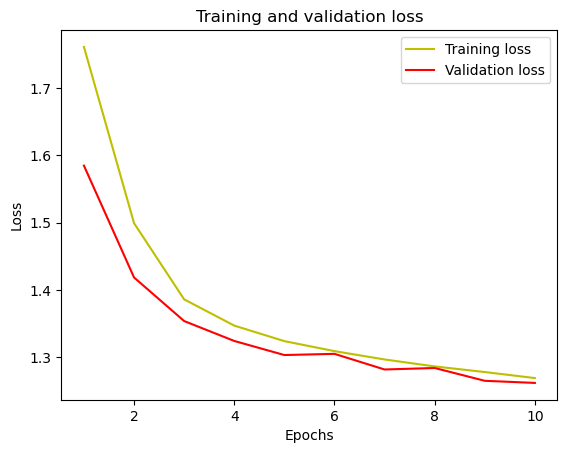

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =history.history['loss']
val_loss =history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

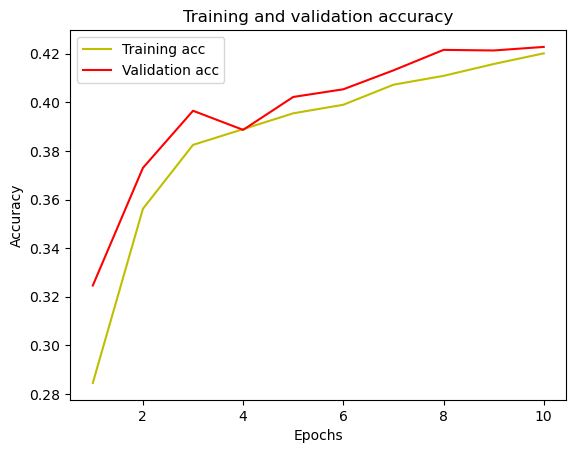

In [87]:
acc =history.history['accuracy']
val_acc =history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [88]:
from sklearn.metrics import classification_report,confusion_matrix


y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test_onehot,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

386/386 [==============================] - 1s 3ms/step


In [89]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.35      0.60      0.44      2822
           1       0.35      0.48      0.40        63
           2       0.19      0.20      0.19        55
           3       0.75      0.20      0.32        59
           4       0.14      0.28      0.19        54
           5       0.25      0.49      0.33        49
           6       0.92      0.16      0.27        69
           7       0.52      0.55      0.54        65
           8       0.50      0.68      0.58        25
           9       0.00      0.00      0.00        16
          10       0.29      0.23      0.26      2553
          11       0.32      0.27      0.30      2535
          12       0.28      0.20      0.23       706
          13       0.14      0.00      0.01       572
          14       0.25      0.12      0.16       574
          15       0.00      0.00      0.00       119
          16       0.36      0.30      0.33       140
          17       0.26    

C:\Users\gram\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gram\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gram\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
